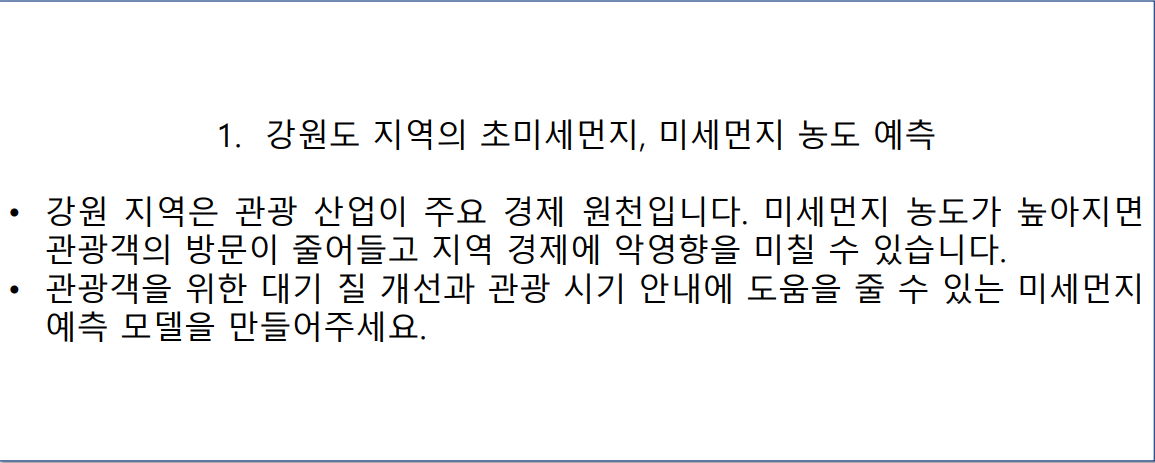

# 구글 드라이브

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 자동차 등록 현황 2011 - 2019

In [9]:
cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/자동차 등록수/car_raw.csv',skiprows=5)
# 강원지역 자동차 등록 현황 파일 불러오기 2011-2019

In [10]:
cars.head()

,월(Monthly),시도명,시군구,관용,자가용,영업용,계,관용.1,자가용.1,영업용.1,...,영업용.2,계.2,관용.3,자가용.3,영업용.3,계.3,관용.4,자가용.4,영업용.4,계.4
0,2011-01,서울,계,"3,969","2,292,616","146,971","2,443,556","2,493","157,299","17,198",...,"52,648","366,723",314.0,"1,062","2,528","3,904","10,487","2,761,341","219,345","2,991,173"
1,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728",...,"1,630","19,198",21.0,94,134,249,431,"218,372","34,948","253,751"
2,2011-01,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,...,"2,096","17,662",10.0,34,157,201,256,"130,718","9,217","140,191"
3,2011-01,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,...,"1,434","10,215",10.0,15,17,42,302,"69,044","4,763","74,109"
4,2011-01,서울,강서구,111,"132,643","15,523","148,277",58,"9,761","1,254",...,"2,672","21,757",13.0,80,88,181,349,"161,402","19,537","181,288"


In [11]:
cars.columns

Index(['월(Monthly)', '시도명', '시군구', '관용', '자가용', '영업용', '계', '관용.1', '자가용.1',
       '영업용.1', '계.1', '관용.2', '자가용.2', '영업용.2', '계.2', '관용.3', '자가용.3',
       '영업용.3', '계.3', '관용.4', '자가용.4', '영업용.4', '계.4'],
      dtype='object')

In [12]:
cars.columns = ['일시', '시도명', '시군구', '승용_관용', '승용_자가용', '승용_영업용', '승용_계',
              '승합_관용', '승합_자가용', '승합_영업용', '승합_계',
              '화물_관용', '화물_자가용', '화물_영업용', '화물_계',
              '특수_관용', '특수_자가용', '특수_영업용', '특수_계',
              '총계_관용', '총계_자가용', '총계_영업용', '총계']

In [13]:
cars = cars[(cars['시도명'] == '강원') & (cars['일시'] >= '2011-01') & (cars['일시'] <= '2019-12')]
# 강원 지역 2011년 1월부터 2019년 12월까지 데이터 필터링

In [14]:
cars = cars[['일시','시군구','총계']]
# 필요한 데이터 일시, 시군구, 총계 데이터만 가져옴

In [15]:
cars.columns = ['일시','시군구','차량수']
# 컬럼명 변경

In [16]:
cars = cars[cars['시군구'] != '계']
# 필요없는 데이터 삭제

In [17]:
cars['차량수'] = cars['차량수'].str.replace(',', '').astype(int)
# 차량수 정수화 ',' 삭제

In [18]:
# 월별 데이터를 일별 데이터로 동일값으로 처리 ex) 1월 : 10 -> 1/1~1/31 : 10
# 일단위 데이터가 없어 편의를 위해 이렇게 처리
daily_data = []

for i, row in cars.iterrows():
    start_date = pd.to_datetime(row['일시'] + '-01')  # 해당 월의 첫날
    days_in_month = start_date.days_in_month         # 해당 월의 일수
    dates = pd.date_range(start=start_date, periods=days_in_month)  # 해당 월의 모든 날짜
    daily_values = [row['차량수']] * days_in_month  # 동일 값 복사
    daily_data.extend(zip(dates, [row['시군구']] * days_in_month, daily_values))

# 일별 데이터프레임 생성
cars = pd.DataFrame(daily_data, columns=['일시', '시군구', '차량수'])


In [19]:
cars

,일시,시군구,차량수
0,2011-01-01,강릉시,89310
1,2011-01-02,강릉시,89310
2,2011-01-03,강릉시,89310
3,2011-01-04,강릉시,89310
4,2011-01-05,강릉시,89310
...,...,...,...
59161,2019-12-27,횡성군,26432
59162,2019-12-28,횡성군,26432
59163,2019-12-29,횡성군,26432
59164,2019-12-30,횡성군,26432


In [20]:
cars

,일시,시군구,차량수
0,2011-01-01,강릉시,89310
1,2011-01-02,강릉시,89310
2,2011-01-03,강릉시,89310
3,2011-01-04,강릉시,89310
4,2011-01-05,강릉시,89310
...,...,...,...
59161,2019-12-27,횡성군,26432
59162,2019-12-28,횡성군,26432
59163,2019-12-29,횡성군,26432
59164,2019-12-30,횡성군,26432


# 기상인자 2011 - 2019

In [21]:
weather_factor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/2010-2019 기상인자/OBS_ASOS_DD_20241129151759.csv',encoding = 'cp949')
# 기상인자 파일 불러오기

In [22]:
weather_factor.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 상대습도(%)
0,90,속초,2010-01-01,-3.1,NaN,4.9,320.0,30.5
1,90,속초,2010-01-02,-0.4,4.0,1.8,290.0,70.3
2,90,속초,2010-01-03,-2.8,NaN,2.5,290.0,33.4
3,90,속초,2010-01-04,-2.3,10.5,2.8,290.0,71.3
4,90,속초,2010-01-05,-4.6,0.0,2.1,290.0,47.8


In [23]:
weather_factor.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최다풍향(16방위)',
       '평균 상대습도(%)'],
      dtype='object')

In [24]:
weather_factor = weather_factor.drop(['지점'],axis = 1)
# 필요없는 열 제거

In [25]:
weather_factor = weather_factor[['일시', '지점명', '평균기온(°C)', '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '최다풍향(16방위)']]
# 열 순서 바꿈

In [26]:
weather_factor.columns = ['일시','시군구','평균기온','평균상대습도','강수량','평균풍속','최다풍향']
# 열 이름 변경

In [27]:
weather_factor['시군구'].unique()

array(['속초', '북춘천', '철원', '대관령', '춘천', '북강릉', '강릉', '동해', '원주', '영월',
       '인제', '홍천', '태백', '정선군'], dtype=object)

In [28]:
# 북춘천, 북강릉 을 제외하고 춘천, 강릉으로 씀
weather_factor = weather_factor[weather_factor['시군구'] != '북춘천']
weather_factor = weather_factor[weather_factor['시군구'] != '북강릉']

In [29]:
weather_factor['시군구'].unique()
# 시군구 값

array(['속초', '철원', '대관령', '춘천', '강릉', '동해', '원주', '영월', '인제', '홍천', '태백',
       '정선군'], dtype=object)

In [30]:
weather_factor['시군구'] = weather_factor['시군구'].replace({'속초': '속초시', '동해': '동해시', '강릉': '강릉시',
                                                       '태백': '태백시', '영월': '영월군', '원주': '원주시', '인제': '인제군',
                                                       '정선군': '정선군', '철원': '철원군', '춘천': '춘천시',
                                                       '홍천': '홍천군'})
# 시군구명 변경 ~~시 ~~군 으로 통일

In [31]:
weather_factor

,일시,시군구,평균기온,평균상대습도,강수량,평균풍속,최다풍향
0,2010-01-01,속초시,-3.1,30.5,NaN,4.9,320.0
1,2010-01-02,속초시,-0.4,70.3,4.0,1.8,290.0
2,2010-01-03,속초시,-2.8,33.4,NaN,2.5,290.0
3,2010-01-04,속초시,-2.3,71.3,10.5,2.8,290.0
4,2010-01-05,속초시,-4.6,47.8,0.0,2.1,290.0
...,...,...,...,...,...,...,...
48420,2019-12-27,정선군,-3.5,75.8,NaN,1.3,160.0
48421,2019-12-28,정선군,-4.3,84.5,NaN,0.8,200.0
48422,2019-12-29,정선군,-1.8,87.9,1.0,0.6,110.0
48423,2019-12-30,정선군,1.9,89.5,1.0,2.3,20.0


In [32]:
# 결측치 확인
missing_values = weather_factor.isnull().sum()
print(missing_values)

일시            0
시군구           0
평균기온         15
평균상대습도       42
강수량       27426
평균풍속         14
최다풍향         93
dtype: int64


In [33]:
# 강수량 결측치를 0으로 대체
weather_factor['강수량'] = weather_factor['강수량'].fillna(0)

In [34]:
# 나머지 결측치를 하루전 데이터로 채움
weather_factor.fillna(method='ffill', inplace=True)

<ipython-input-34-6fa8447db6d0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_factor.fillna(method='ffill', inplace=True)


In [35]:
# 결측치 확인
missing_values = weather_factor.isnull().sum()
print(missing_values)

일시        0
시군구       0
평균기온      0
평균상대습도    0
강수량       0
평균풍속      0
최다풍향      0
dtype: int64


In [36]:
weather_factor = weather_factor[(weather_factor['일시'] >= '2011-01-01') & (weather_factor['일시'] <= '2019-12-31')]
# 2011년 1월부터 2019년 12월까지 데이터 필터링

In [37]:
# 누락된 데이터 확인
# 1. 필요한 날짜 범위 생성
date_range = pd.date_range(start='2011-01-01', end='2019-12-31')

# 2. 지역별로 데이터 확인
missing_dates = {}
regions = weather_factor['시군구'].unique()

for region in regions:
    region_data = weather_factor[weather_factor['시군구'] == region]
    available_dates = pd.to_datetime(region_data['일시']).dt.date
    missing = set(date_range.date) - set(available_dates)
    missing_dates[region] = sorted(missing)

# 3. 출력
for region, missing in missing_dates.items():
    print(f"Region: {region}, Missing Dates: {len(missing)}")
    print(missing)

Region: 속초시, Missing Dates: 0
[]
Region: 철원군, Missing Dates: 0
[]
Region: 대관령, Missing Dates: 0
[]
Region: 춘천시, Missing Dates: 0
[]
Region: 강릉시, Missing Dates: 0
[]
Region: 동해시, Missing Dates: 0
[]
Region: 원주시, Missing Dates: 0
[]
Region: 영월군, Missing Dates: 0
[]
Region: 인제군, Missing Dates: 0
[]
Region: 홍천군, Missing Dates: 0
[]
Region: 태백시, Missing Dates: 0
[]
Region: 정선군, Missing Dates: 2
[datetime.date(2011, 7, 25), datetime.date(2011, 8, 18)]


In [38]:
# 누락된 날짜를 데이터프레임에 추가
missing_dates = [pd.Timestamp('2011-07-25'), pd.Timestamp('2011-08-18')]
region_name = '정선군'

# 1. 누락된 행 추가
for missing_date in missing_dates:
    weather_factor = pd.concat([
        weather_factor,
        pd.DataFrame({'시군구': [region_name], '일시': [missing_date], '평균기온': [None], '평균상대습도': [None],
                      '강수량': [None], '평균풍속': [None], '최다풍향': [None]})
    ], ignore_index=True)

# 2. 날짜와 지역 기준으로 정렬
weather_factor['일시'] = pd.to_datetime(weather_factor['일시'])
weather_factor = weather_factor.sort_values(by=['시군구', '일시'])

# 3. 보간법으로 결측값 채우기
weather_factor_interpolated = weather_factor.groupby('시군구').apply(lambda group: group.interpolate(method='linear'))

# 4. 중복행 제거 후 하나만 남기기
weather_factor = weather_factor.drop_duplicates(subset=['일시', '시군구'], keep='first')

<ipython-input-38-006684c26b42>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_factor = pd.concat([
<ipython-input-38-006684c26b42>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_factor = pd.concat([
<ipython-input-38-006684c26b42>:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather_factor_interpolated = weather_factor.groupby('시군구').apply(lambda

In [39]:
weather_factor

,일시,시군구,평균기온,평균상대습도,강수량,평균풍속,최다풍향
13148,2011-01-01,강릉시,-1.5,71.4,6.0,3.2,320.0
13149,2011-01-02,강릉시,0.6,66.4,0.5,1.9,270.0
13150,2011-01-03,강릉시,-0.9,83.6,6.5,2.1,270.0
13151,2011-01-04,강릉시,-0.1,47.1,0.0,3.7,250.0
13152,2011-01-05,강릉시,-0.6,46.5,0.0,4.7,250.0
...,...,...,...,...,...,...,...
32865,2019-12-27,홍천군,-2.8,62.0,0.0,1.0,270.0
32866,2019-12-28,홍천군,-1.7,66.9,0.0,0.7,50.0
32867,2019-12-29,홍천군,0.2,75.0,0.3,0.3,50.0
32868,2019-12-30,홍천군,1.8,81.4,0.4,1.1,270.0


# 대기오염 2011 - 2019

In [40]:
a1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2010년01분기.csv',encoding = 'cp949')

In [41]:
a2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2010년02분기.csv',encoding = 'cp949')

In [42]:
a3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2010년03분기.csv',encoding = 'cp949')

In [43]:
a4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2010년04분기.csv', encoding = 'cp949')

In [44]:
a5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2011년01분기.csv', encoding = 'cp949')

In [45]:
a6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2011년02분기.csv', encoding = 'cp949')

In [46]:
a7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2011년03분기.csv', encoding = 'cp949')

In [47]:
a8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2011년04분기.csv', encoding = 'cp949')

In [48]:
a9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2012년01분기.csv', encoding = 'cp949')

In [49]:
a10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2012년02분기.csv', encoding = 'cp949')

In [50]:
a11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2012년03분기.csv', encoding = 'cp949')

In [51]:
a12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2012년04분기.csv', encoding = 'cp949')

In [52]:
a13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2013년01분기.csv', encoding = 'cp949')

In [53]:
a14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2013년02분기.csv', encoding = 'cp949')

In [54]:
a15 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2013년03분기.csv', encoding = 'cp949')

In [55]:
a16 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2013년04분기.csv', encoding = 'cp949')

In [56]:
a17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2014년1분기.csv', encoding = 'cp949')

In [57]:
a18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2014년2분기.csv', encoding = 'cp949')

In [58]:
a19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2014년3분기.csv', encoding = 'cp949')

In [59]:
a20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2014년4분기.csv', encoding = 'cp949')

In [60]:
a21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2015년1분기.csv', encoding = 'cp949')

In [61]:
a22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2015년2분기.csv', encoding = 'cp949')

In [62]:
a23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2015년3분기.csv', encoding = 'cp949')

In [63]:
a24 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2015년4분기.csv', encoding = 'cp949')

In [64]:
a25 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2016년1분기.csv', encoding = 'cp949')

In [65]:
a62 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2016년2분기.csv', encoding = 'cp949')

In [66]:
a63 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2016년3분기.csv', encoding = 'cp949')

In [67]:
a64 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2016년4분기.csv', encoding = 'cp949')

In [68]:
a26 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년01월.csv', encoding = 'cp949')

In [69]:
a27 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년02월.csv', encoding = 'cp949')

In [70]:
a28= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년03월.csv', encoding = 'cp949')

In [71]:
a29 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년04월.csv', encoding = 'cp949')

In [72]:
a30 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년05월.csv', encoding = 'cp949')

In [73]:
a31 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년06월.csv', encoding = 'cp949')

In [74]:
a32 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년07월.csv', encoding = 'cp949')

In [75]:
a33 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년08월.csv', encoding = 'cp949')

In [76]:
a34 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년09월.csv', encoding = 'cp949')

In [77]:
a35 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년10월.csv', encoding = 'cp949')

In [78]:
a36 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년11월.csv', encoding = 'cp949')

In [79]:
a37 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2017년12월.csv', encoding = 'cp949')

In [80]:
a38 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년1월.csv', encoding = 'cp949')

In [81]:
a39 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년2월.csv', encoding = 'cp949')

In [82]:
a40 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년3월.csv', encoding = 'cp949')

In [83]:
a41 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년4월.csv', encoding = 'cp949')

In [84]:
a42 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년5월.csv', encoding = 'cp949')

In [85]:
a43 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년6월.csv', encoding = 'cp949')

In [86]:
a44 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년7월.csv', encoding = 'cp949')

In [87]:
a45 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년8월.csv', encoding = 'cp949')

In [88]:
a46 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년9월.csv', encoding = 'cp949')

In [89]:
a47 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년10월.csv', encoding = 'cp949')

In [90]:
a61 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년11월.csv', encoding = 'cp949')

In [91]:
a48 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2018년12월.csv', encoding = 'cp949')

In [92]:
a49 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년01월.csv', encoding = 'cp949')

In [93]:
a50 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년02월.csv', encoding = 'cp949')

In [94]:
a51 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년03월.csv', encoding = 'cp949')

In [95]:
a52 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년04월.csv', encoding = 'cp949')

In [96]:
a53 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년05월.csv', encoding = 'cp949')

In [97]:
a54 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년06월.csv', encoding = 'cp949')

In [98]:
a55 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년07월.csv', encoding = 'cp949')

In [99]:
a56 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년08월.csv', encoding = 'cp949')

In [100]:
a57 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년09월.csv', encoding = 'cp949')

In [101]:
a58 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년10월.csv', encoding = 'cp949')

In [102]:
a59 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년11월.csv', encoding = 'cp949')

In [103]:
a60 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/대기오염_/2019년12월.csv', encoding = 'cp949')

# 대기오염 데이터 합치기

In [104]:
# SO2 : 아황산가스, CO : 일산화탄소, O3 : 오존, NO2 : 이산화질소

In [105]:
# a1부터 a56까지를 리스트로 생성
file_list = [globals()[f"a{i}"] for i in range(1, 65)]

In [106]:
# 데이터프레임 결합
air = pd.concat(file_list, ignore_index=True)

In [107]:
len(air)

1092477

In [108]:
# -999인 값을 결측치로 대체
air.replace(-999, np.nan, inplace=True)

In [109]:
air['측정일시'] = air['측정일시'].astype(str)

In [110]:
air

,지역,측정일시,SO2,CO,O3,NO2,PM10
0,강원 춘천시,2010010101,0.0060,0.4,0.024,0.0080,30.0
1,강원 춘천시,2010010102,0.0060,0.5,0.017,0.0130,28.0
2,강원 춘천시,2010010103,0.0040,0.4,0.019,0.0070,28.0
3,강원 춘천시,2010010104,0.0040,0.4,0.020,0.0060,29.0
4,강원 춘천시,2010010105,0.0050,0.6,0.016,0.0100,28.0
...,...,...,...,...,...,...,...
1092472,강원 횡성군,2016123120,0.0025,0.4,0.029,0.0113,62.0
1092473,강원 횡성군,2016123121,0.0025,0.5,0.025,0.0121,70.0
1092474,강원 횡성군,2016123122,0.0026,0.5,0.021,0.0114,62.0
1092475,강원 횡성군,2016123123,0.0025,0.5,0.017,0.0114,70.0


In [111]:
# 시간단위 데이터를 일(평균)단위 데이터로 만들기 위해

# '측정일시'를 일시로 변환 (앞 8자리만 추출: YYYYMMDD)
air['일시'] = air['측정일시'].str[:8]

# '일시'와 '지역'을 기준으로 그룹화하여 평균 계산
air = air.groupby(['일시', '지역']).mean(numeric_only=True).reset_index()


In [112]:
air

,일시,지역,SO2,CO,O3,NO2,PM10
0,20100101,강원 강릉시,0.009500,0.800000,0.024375,0.012583,42.250000
1,20100101,강원 고성군,0.005908,0.550000,0.033583,0.004971,39.583333
2,20100101,강원 동해시,0.012333,0.770833,0.031250,0.009292,46.083333
3,20100101,강원 삼척시,0.014125,0.754167,0.026083,0.015500,41.333333
4,20100101,강원 양구군,0.002929,0.504167,0.025292,0.005508,36.869565
...,...,...,...,...,...,...,...
36246,20191231,강원 태백시,0.002250,0.435000,0.033700,0.004200,27.550000
36247,20191231,강원 평창군,0.001583,0.200000,0.027000,0.008667,36.125000
36248,20191231,강원 홍천군,0.002792,0.404167,0.022750,0.013708,40.500000
36249,20191231,강원 화천군,0.002708,0.558333,0.028458,0.007500,21.208333


In [113]:
print(air.columns)

Index(['일시', '지역', 'SO2', 'CO', 'O3', 'NO2', 'PM10'], dtype='object')


In [114]:
air['일시'] = pd.to_datetime(air['일시'], format='%Y%m%d')

In [115]:
# 시군구 형식 통일
air['지역'] = air['지역'].str.replace('강원 ', '', regex=False)

In [116]:
air['지역'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '양구군', '원주시', '정선군', '춘천시', '횡성군',
       '평창군', '양양군', '영월군', '철원군', '속초시', '태백시', '홍천군', '화천군', '인제군'],
      dtype=object)

In [117]:
air.rename(columns={'지역': '시군구'}, inplace=True)

In [118]:
air = air[(air['일시'] >= '2011-01-01') & (air['일시'] <= '2019-12-31')]
# 2011년 1월부터 2019년 12월까지 데이터 필터링

In [119]:
air

,일시,시군구,SO2,CO,O3,NO2,PM10
3285,2011-01-01,강릉시,0.006083,0.458333,0.026208,0.012250,25.500000
3286,2011-01-01,고성군,0.002596,0.316667,0.038167,0.003554,25.666667
3287,2011-01-01,동해시,0.003708,0.433333,0.029708,0.012792,17.166667
3288,2011-01-01,삼척시,0.004708,0.504167,0.030375,0.010083,24.750000
3289,2011-01-01,양구군,0.002021,0.595833,0.024042,0.005071,32.083333
...,...,...,...,...,...,...,...
36246,2019-12-31,태백시,0.002250,0.435000,0.033700,0.004200,27.550000
36247,2019-12-31,평창군,0.001583,0.200000,0.027000,0.008667,36.125000
36248,2019-12-31,홍천군,0.002792,0.404167,0.022750,0.013708,40.500000
36249,2019-12-31,화천군,0.002708,0.558333,0.028458,0.007500,21.208333


# 인구수 2011 - 2019

In [120]:
population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/인구수/강원지역월별인구수.csv',skiprows=1,encoding = 'cp949')

In [121]:
population['행정구역(시군구)별'].unique()

array(['속초시', '철원군', '춘천시', '강릉시', '동해시', '원주시', '영월군', '인제군', '홍천군',
       '태백시', '정선군'], dtype=object)

In [122]:
population.columns = ['시군구','일시','인구수']

In [123]:
population['일시'] = population['일시'].str.replace(' 월', '', regex=False).str.replace('.', '-', regex=False)

In [124]:
# 월단위 데이터를 일단위로 변경 동일값 복사로 대체

daily_data = []

for i, row in population.iterrows():
    # 해당 월의 첫날 구하기
    start_date = pd.to_datetime(row['일시'] + '-01')  # '2023-01-01'
    # 해당 월의 모든 날짜 생성
    days_in_month = start_date.days_in_month
    dates = pd.date_range(start=start_date, periods=days_in_month)
    # 동일 값 복사
    daily_values = [row['인구수']] * days_in_month
    # 날짜와 시군구 결합
    daily_data.extend(zip([row['시군구']] * days_in_month, dates, daily_values))

# 일별 데이터프레임 생성
population = pd.DataFrame(daily_data, columns=['시군구', '일시', '인구수'])


In [125]:
population = population[(population['일시'] >= '2011-01-01') & (population['일시'] <= '2019-12-31')]
# 강원 지역 2011년 1월부터 2019년 12월까지 데이터 필터링

In [126]:
population

,시군구,일시,인구수
0,속초시,2011-01-01,36636
1,속초시,2011-01-02,36636
2,속초시,2011-01-03,36636
3,속초시,2011-01-04,36636
4,속초시,2011-01-05,36636
...,...,...,...
39812,정선군,2019-12-27,19974
39813,정선군,2019-12-28,19974
39814,정선군,2019-12-29,19974
39815,정선군,2019-12-30,19974


# 전력량 2011 - 2019

In [127]:
electricity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/전력량/강원도 전력판매량(2009-2019년)_출처_KEPCO.csv',skiprows = 2)

In [128]:
electricity['시군구'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군'],
      dtype=object)

In [129]:
electricity = electricity.drop('Unnamed: 16', axis=1)

In [130]:
electricity['업종별'] = electricity['업종별'].str.replace('합 계', '합계')

In [131]:
electricity['연도'] = electricity['연도'].astype(str).str.replace('년', '').astype(int)

In [132]:
electricity = electricity[(electricity['연도'] >= 2011) & (electricity['연도'] <= 2019)]

In [133]:
electricity = electricity[electricity['업종별'] == '합계']

In [134]:
electricity = electricity.melt(id_vars=['연도', '시군구', '업종별'],
                        value_vars=[' 1월 ', ' 2월 ', ' 3월 ', ' 4월 ', ' 5월 ',
       ' 6월 ', ' 7월 ', ' 8월 ', ' 9월 ', ' 10월 ', ' 11월 ', ' 12월 '],
                        var_name='월', value_name='값')

electricity['월'] = electricity['월'].str.replace('월', '')
electricity['일시'] = electricity['연도'].astype(str) + '-' + electricity['월'].astype(int).astype(str).str.zfill(2)


In [135]:
electricity = electricity.drop('연도', axis=1)
electricity = electricity.drop('월', axis=1)

In [136]:
electricity = electricity[['일시','시군구','업종별','값']]

In [137]:
electricity.columns = ['일시','시군구','업종별','전력량']

In [138]:
electricity = electricity.drop(['업종별'], axis=1)

In [139]:
# 월단위 데이터를 일단위로 변경 동일값 복사

daily_data = []

for i, row in electricity.iterrows():
    # 해당 월의 첫날 구하기
    start_date = pd.to_datetime(row['일시'] + '-01')  # '2023-01-01'
    # 해당 월의 모든 날짜 생성
    days_in_month = start_date.days_in_month
    dates = pd.date_range(start=start_date, periods=days_in_month)
    # 동일 값 복사
    daily_values = [row['전력량']] * days_in_month
    # 날짜와 시군구 결합
    daily_data.extend(zip([row['시군구']] * days_in_month, dates, daily_values))

# 일별 데이터프레임 생성
electricity = pd.DataFrame(daily_data, columns=['시군구', '일시', '전력량'])

In [140]:
electricity

,시군구,일시,전력량
0,강릉시,2011-01-01,"169,825"
1,강릉시,2011-01-02,"169,825"
2,강릉시,2011-01-03,"169,825"
3,강릉시,2011-01-04,"169,825"
4,강릉시,2011-01-05,"169,825"
...,...,...,...
58796,양양군,2019-12-27,"27,468,885"
58797,양양군,2019-12-28,"27,468,885"
58798,양양군,2019-12-29,"27,468,885"
58799,양양군,2019-12-30,"27,468,885"


# 데이터 합치기

In [141]:
# '춘천시', '정선군', '강릉시', '원주시', '동해시'

In [142]:
target_cities = ['춘천시', '정선군', '강릉시', '원주시', '동해시']

In [143]:
# 합치기 위해 각 데이터별 행 개수 확인

In [144]:
cars = cars[cars['시군구'].isin(target_cities)]

In [145]:
len(cars)

16435

In [146]:
weather_factor = weather_factor[weather_factor['시군구'].isin(target_cities)]

In [147]:
len(weather_factor)

16435

In [148]:
air = air[air['시군구'].isin(target_cities)]

In [149]:
len(air)

16435

In [150]:
population = population[population['시군구'].isin(target_cities)]

In [151]:
len(population)

16435

In [152]:
electricity = electricity[electricity['시군구'].isin(target_cities)]

In [153]:
len(electricity)

16435

In [154]:
# 정렬, 인덱스 초기화

In [155]:
cars = cars.sort_values(by=['시군구', '일시'])
cars = cars.reset_index(drop=True)

In [156]:
weather_factor = weather_factor.sort_values(by=['시군구', '일시'])
weather_factor = weather_factor.reset_index(drop=True)

In [157]:
air = air.sort_values(by=['시군구', '일시'])
air = air.reset_index(drop=True)

In [158]:
population = population.sort_values(by=['시군구', '일시'])
population = population.reset_index(drop=True)

In [159]:
electricity = electricity.sort_values(by=['시군구', '일시'])
electricity = electricity.reset_index(drop=True)

In [160]:
data = pd.concat([cars, weather_factor, air, population, electricity], axis=1)

In [161]:
data

,일시,시군구,차량수,일시,시군구,평균기온,평균상대습도,강수량,평균풍속,최다풍향,...,CO,O3,NO2,PM10,시군구,일시,인구수,시군구,일시,전력량
0,2011-01-01,강릉시,89310,2011-01-01,강릉시,-1.5,71.4,6.0,3.2,320.0,...,0.458333,0.026208,0.012250,25.500000,강릉시,2011-01-01,89915,강릉시,2011-01-01,"169,825"
1,2011-01-02,강릉시,89310,2011-01-02,강릉시,0.6,66.4,0.5,1.9,270.0,...,0.454167,0.021583,0.019667,20.708333,강릉시,2011-01-02,89915,강릉시,2011-01-02,"169,825"
2,2011-01-03,강릉시,89310,2011-01-03,강릉시,-0.9,83.6,6.5,2.1,270.0,...,0.487500,0.022500,0.018375,20.916667,강릉시,2011-01-03,89915,강릉시,2011-01-03,"169,825"
3,2011-01-04,강릉시,89310,2011-01-04,강릉시,-0.1,47.1,0.0,3.7,250.0,...,0.533333,0.021542,0.022792,36.666667,강릉시,2011-01-04,89915,강릉시,2011-01-04,"169,825"
4,2011-01-05,강릉시,89310,2011-01-05,강릉시,-0.6,46.5,0.0,4.7,250.0,...,0.504762,0.023429,0.019429,50.333333,강릉시,2011-01-05,89915,강릉시,2011-01-05,"169,825"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16430,2019-12-27,춘천시,134390,2019-12-27,춘천시,-2.5,59.3,0.0,1.1,270.0,...,0.570833,0.022271,0.017417,40.541667,춘천시,2019-12-27,123006,춘천시,2019-12-27,"163,734,041"
16431,2019-12-28,춘천시,134390,2019-12-28,춘천시,-1.5,66.0,0.0,0.4,20.0,...,0.750000,0.009083,0.025958,55.312500,춘천시,2019-12-28,123006,춘천시,2019-12-28,"163,734,041"
16432,2019-12-29,춘천시,134390,2019-12-29,춘천시,0.5,76.3,0.0,0.3,360.0,...,0.966667,0.004104,0.027792,68.187500,춘천시,2019-12-29,123006,춘천시,2019-12-29,"163,734,041"
16433,2019-12-30,춘천시,134390,2019-12-30,춘천시,2.2,68.8,0.5,1.6,250.0,...,0.737500,0.013292,0.019458,44.208333,춘천시,2019-12-30,123006,춘천시,2019-12-30,"163,734,041"


In [162]:
data = data.loc[:, ~data.columns.duplicated()]

In [163]:
data = data[['일시', '시군구', '차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', '인구수', '전력량','PM10']]

In [164]:
data

,일시,시군구,차량수,평균기온,평균상대습도,강수량,평균풍속,최다풍향,SO2,CO,O3,NO2,인구수,전력량,PM10
0,2011-01-01,강릉시,89310,-1.5,71.4,6.0,3.2,320.0,0.006083,0.458333,0.026208,0.012250,89915,"169,825",25.500000
1,2011-01-02,강릉시,89310,0.6,66.4,0.5,1.9,270.0,0.006625,0.454167,0.021583,0.019667,89915,"169,825",20.708333
2,2011-01-03,강릉시,89310,-0.9,83.6,6.5,2.1,270.0,0.005750,0.487500,0.022500,0.018375,89915,"169,825",20.916667
3,2011-01-04,강릉시,89310,-0.1,47.1,0.0,3.7,250.0,0.005667,0.533333,0.021542,0.022792,89915,"169,825",36.666667
4,2011-01-05,강릉시,89310,-0.6,46.5,0.0,4.7,250.0,0.006048,0.504762,0.023429,0.019429,89915,"169,825",50.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16430,2019-12-27,춘천시,134390,-2.5,59.3,0.0,1.1,270.0,0.002375,0.570833,0.022271,0.017417,123006,"163,734,041",40.541667
16431,2019-12-28,춘천시,134390,-1.5,66.0,0.0,0.4,20.0,0.002938,0.750000,0.009083,0.025958,123006,"163,734,041",55.312500
16432,2019-12-29,춘천시,134390,0.5,76.3,0.0,0.3,360.0,0.003458,0.966667,0.004104,0.027792,123006,"163,734,041",68.187500
16433,2019-12-30,춘천시,134390,2.2,68.8,0.5,1.6,250.0,0.002417,0.737500,0.013292,0.019458,123006,"163,734,041",44.208333


In [165]:
# 결측치 개수 확인
missing_counts = data.isnull().sum()

# 결측치 비율 확인
missing_percentage = (data.isnull().sum() / len(data)) * 100

# 결측치 확인 결과 출력
print("결측치 개수:\n", missing_counts)
print("\n결측치 비율(%):\n", missing_percentage)


결측치 개수:
 일시          0
시군구         0
차량수         0
평균기온        2
평균상대습도      2
강수량         2
평균풍속        2
최다풍향        2
SO2       247
CO        239
O3        260
NO2       279
인구수         0
전력량         0
PM10      367
dtype: int64

결측치 비율(%):
 일시        0.000000
시군구       0.000000
차량수       0.000000
평균기온      0.012169
평균상대습도    0.012169
강수량       0.012169
평균풍속      0.012169
최다풍향      0.012169
SO2       1.502890
CO        1.454214
O3        1.581990
NO2       1.697597
인구수       0.000000
전력량       0.000000
PM10      2.233039
dtype: float64


In [166]:
# 각 열별 결측치 처리
data['평균기온'] = data['평균기온'].interpolate(method='linear') # 선형 보간법
data['평균상대습도'] = data['평균상대습도'].interpolate(method='linear')
data['강수량'] = data['강수량'].fillna(0)
data['평균풍속'] = data['평균풍속'].interpolate(method='linear')
most_frequent_wind_direction = data['최다풍향'].mode()[0] # 최빈값
data['최다풍향'] = data['최다풍향'].fillna(most_frequent_wind_direction)

# 선형 보간법 적용
data['SO2'] = data['SO2'].interpolate(method='linear')
data['CO'] = data['CO'].interpolate(method='linear')
data['O3'] = data['O3'].interpolate(method='linear')
data['NO2'] = data['NO2'].interpolate(method='linear')

# PM10 결측치가 있는 행 제거
data = data.dropna(subset=['PM10'])

In [167]:
data['전력량'] = data['전력량'].replace(',', '', regex=True).astype(float)
data['인구수'] = data['인구수'].replace(',', '', regex=True).astype(float)
data['차량수'] = data['차량수'].replace(',', '', regex=True).astype(float)

<ipython-input-167-9cb312729cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['전력량'] = data['전력량'].replace(',', '', regex=True).astype(float)
<ipython-input-167-9cb312729cf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['인구수'] = data['인구수'].replace(',', '', regex=True).astype(float)
<ipython-input-167-9cb312729cf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [168]:
data

,일시,시군구,차량수,평균기온,평균상대습도,강수량,평균풍속,최다풍향,SO2,CO,O3,NO2,인구수,전력량,PM10
0,2011-01-01,강릉시,89310.0,-1.5,71.4,6.0,3.2,320.0,0.006083,0.458333,0.026208,0.012250,89915.0,169825.0,25.500000
1,2011-01-02,강릉시,89310.0,0.6,66.4,0.5,1.9,270.0,0.006625,0.454167,0.021583,0.019667,89915.0,169825.0,20.708333
2,2011-01-03,강릉시,89310.0,-0.9,83.6,6.5,2.1,270.0,0.005750,0.487500,0.022500,0.018375,89915.0,169825.0,20.916667
3,2011-01-04,강릉시,89310.0,-0.1,47.1,0.0,3.7,250.0,0.005667,0.533333,0.021542,0.022792,89915.0,169825.0,36.666667
4,2011-01-05,강릉시,89310.0,-0.6,46.5,0.0,4.7,250.0,0.006048,0.504762,0.023429,0.019429,89915.0,169825.0,50.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16430,2019-12-27,춘천시,134390.0,-2.5,59.3,0.0,1.1,270.0,0.002375,0.570833,0.022271,0.017417,123006.0,163734041.0,40.541667
16431,2019-12-28,춘천시,134390.0,-1.5,66.0,0.0,0.4,20.0,0.002938,0.750000,0.009083,0.025958,123006.0,163734041.0,55.312500
16432,2019-12-29,춘천시,134390.0,0.5,76.3,0.0,0.3,360.0,0.003458,0.966667,0.004104,0.027792,123006.0,163734041.0,68.187500
16433,2019-12-30,춘천시,134390.0,2.2,68.8,0.5,1.6,250.0,0.002417,0.737500,0.013292,0.019458,123006.0,163734041.0,44.208333


# 추가

In [169]:
# 1일 전 미세먼지 를 추가한 데이터

In [170]:
data_plus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 data/추가/data_plus.csv', encoding='cp949')

In [171]:
data_plus = data_plus.drop(columns=['Unnamed: 17'], errors='ignore')

In [172]:
data_plus = data_plus.dropna()  # 결측치 제거

In [173]:
data_plus

,일시,시군구,차량수,평균기온,평균상대습도,강수량,평균풍속,최다풍향,SO2,CO,O3,NO2,인구수,전력량,PM10,PM10-1d
0,2011-01-01,강릉시,89310,-1.5,71.4,6.0,3.2,320,0.006083,0.458333,0.026208,0.012250,89915,169825,25.500000,35.541667
1,2011-01-02,강릉시,89310,0.6,66.4,0.5,1.9,270,0.006625,0.454167,0.021583,0.019667,89915,169825,20.708333,25.500000
2,2011-01-03,강릉시,89310,-0.9,83.6,6.5,2.1,270,0.005750,0.487500,0.022500,0.018375,89915,169825,20.916667,20.708333
3,2011-01-04,강릉시,89310,-0.1,47.1,0.0,3.7,250,0.005667,0.533333,0.021542,0.022792,89915,169825,36.666667,20.916667
4,2011-01-05,강릉시,89310,-0.6,46.5,0.0,4.7,250,0.006048,0.504762,0.023429,0.019429,89915,169825,50.333333,36.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063,2019-12-27,춘천시,134390,-2.5,59.3,0.0,1.1,270,0.002375,0.570833,0.022271,0.017417,123006,163734041,40.541667,50.541667
16064,2019-12-28,춘천시,134390,-1.5,66.0,0.0,0.4,20,0.002938,0.750000,0.009083,0.025958,123006,163734041,55.312500,40.541667
16065,2019-12-29,춘천시,134390,0.5,76.3,0.0,0.3,360,0.003458,0.966667,0.004104,0.027792,123006,163734041,68.187500,55.312500
16066,2019-12-30,춘천시,134390,2.2,68.8,0.5,1.6,250,0.002417,0.737500,0.013292,0.019458,123006,163734041,44.208333,68.187500


In [174]:
# 서풍 계열 조건을 적용
data_plus['서풍계열'] = data_plus['최다풍향'].apply(
    lambda x: 3 if 247.5 <= x <= 292.5 else
              2 if 225 <= x <= 315 else
              1 if 202.5 <= x <= 337.5 else
              0
)

# x
# 서풍 계열 여부를 3일 뒤 데이터로 이동
# data_plus['서풍계열_3일후'] = data_plus['서풍계열'].shift(-3)
# x

# 결과 확인
# print(data_plus[['최다풍향', '서풍계열', '서풍계열_3일후']].head(10))

print(data_plus[['최다풍향', '서풍계열']].head(10))


   최다풍향  서풍계열
0   320     1
1   270     3
2   270     3
3   250     3
4   250     3
5   250     3
6   250     3
7   270     3
8   250     3
9   250     3


In [175]:
# '일시' 열을 datetime 형식으로 변환
data_plus['일시'] = pd.to_datetime(data_plus['일시'])

# '월' 정보 추가
data_plus['월'] = data_plus['일시'].dt.month

# '계절' 열 추가
def assign_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

data_plus['계절'] = data_plus['월'].apply(assign_season)

# '일시'를 인덱스로 설정
data_plus = data_plus.set_index('일시')

# '연도'와 '월' 삭제
data_plus = data_plus.drop(columns=['연도', '월'], errors='ignore')

# 결과 확인
print(data_plus.head())


            시군구    차량수  평균기온  평균상대습도  강수량  평균풍속  최다풍향       SO2        CO  \
일시                                                                          
2011-01-01  강릉시  89310  -1.5    71.4  6.0   3.2   320  0.006083  0.458333   
2011-01-02  강릉시  89310   0.6    66.4  0.5   1.9   270  0.006625  0.454167   
2011-01-03  강릉시  89310  -0.9    83.6  6.5   2.1   270  0.005750  0.487500   
2011-01-04  강릉시  89310  -0.1    47.1  0.0   3.7   250  0.005667  0.533333   
2011-01-05  강릉시  89310  -0.6    46.5  0.0   4.7   250  0.006048  0.504762   

                  O3       NO2    인구수     전력량       PM10    PM10-1d  서풍계열  계절  
일시                                                                             
2011-01-01  0.026208  0.012250  89915  169825  25.500000  35.541667     1  겨울  
2011-01-02  0.021583  0.019667  89915  169825  20.708333  25.500000     3  겨울  
2011-01-03  0.022500  0.018375  89915  169825  20.916667  20.708333     3  겨울  
2011-01-04  0.021542  0.022792  89915  169825  36.666667  20

In [176]:
season_map = {'봄': 1, '여름': 2, '가을': 3, '겨울': 4}
data_plus['계절_숫자'] = data_plus['계절'].map(season_map)

# 결과 확인
print(data_plus[['계절', '계절_숫자']].head())


            계절  계절_숫자
일시                   
2011-01-01  겨울      4
2011-01-02  겨울      4
2011-01-03  겨울      4
2011-01-04  겨울      4
2011-01-05  겨울      4


In [177]:
data_plus = pd.get_dummies(data_plus, columns=['계절'], prefix='계절')

# 결과 확인
print(data_plus.head())


            시군구    차량수  평균기온  평균상대습도  강수량  평균풍속  최다풍향       SO2        CO  \
일시                                                                          
2011-01-01  강릉시  89310  -1.5    71.4  6.0   3.2   320  0.006083  0.458333   
2011-01-02  강릉시  89310   0.6    66.4  0.5   1.9   270  0.006625  0.454167   
2011-01-03  강릉시  89310  -0.9    83.6  6.5   2.1   270  0.005750  0.487500   
2011-01-04  강릉시  89310  -0.1    47.1  0.0   3.7   250  0.005667  0.533333   
2011-01-05  강릉시  89310  -0.6    46.5  0.0   4.7   250  0.006048  0.504762   

                  O3  ...    인구수     전력량       PM10    PM10-1d  서풍계열  계절_숫자  \
일시                    ...                                                     
2011-01-01  0.026208  ...  89915  169825  25.500000  35.541667     1      4   
2011-01-02  0.021583  ...  89915  169825  20.708333  25.500000     3      4   
2011-01-03  0.022500  ...  89915  169825  20.916667  20.708333     3      4   
2011-01-04  0.021542  ...  89915  169825  36.666667  20.916667   

In [178]:
# '일시'를 열로 복원
data_plus = data_plus.reset_index()

# 결과 확인
print(data_plus.columns)


Index(['일시', '시군구', '차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', '인구수', '전력량', 'PM10', 'PM10-1d', '서풍계열', '계절_숫자',
       '계절_가을', '계절_겨울', '계절_봄', '계절_여름'],
      dtype='object')


In [179]:
data_plus.columns

Index(['일시', '시군구', '차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', '인구수', '전력량', 'PM10', 'PM10-1d', '서풍계열', '계절_숫자',
       '계절_가을', '계절_겨울', '계절_봄', '계절_여름'],
      dtype='object')

In [180]:
data_plus

,일시,시군구,차량수,평균기온,평균상대습도,강수량,평균풍속,최다풍향,SO2,CO,...,인구수,전력량,PM10,PM10-1d,서풍계열,계절_숫자,계절_가을,계절_겨울,계절_봄,계절_여름
0,2011-01-01,강릉시,89310,-1.5,71.4,6.0,3.2,320,0.006083,0.458333,...,89915,169825,25.500000,35.541667,1,4,False,True,False,False
1,2011-01-02,강릉시,89310,0.6,66.4,0.5,1.9,270,0.006625,0.454167,...,89915,169825,20.708333,25.500000,3,4,False,True,False,False
2,2011-01-03,강릉시,89310,-0.9,83.6,6.5,2.1,270,0.005750,0.487500,...,89915,169825,20.916667,20.708333,3,4,False,True,False,False
3,2011-01-04,강릉시,89310,-0.1,47.1,0.0,3.7,250,0.005667,0.533333,...,89915,169825,36.666667,20.916667,3,4,False,True,False,False
4,2011-01-05,강릉시,89310,-0.6,46.5,0.0,4.7,250,0.006048,0.504762,...,89915,169825,50.333333,36.666667,3,4,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063,2019-12-27,춘천시,134390,-2.5,59.3,0.0,1.1,270,0.002375,0.570833,...,123006,163734041,40.541667,50.541667,3,4,False,True,False,False
16064,2019-12-28,춘천시,134390,-1.5,66.0,0.0,0.4,20,0.002938,0.750000,...,123006,163734041,55.312500,40.541667,0,4,False,True,False,False
16065,2019-12-29,춘천시,134390,0.5,76.3,0.0,0.3,360,0.003458,0.966667,...,123006,163734041,68.187500,55.312500,0,4,False,True,False,False
16066,2019-12-30,춘천시,134390,2.2,68.8,0.5,1.6,250,0.002417,0.737500,...,123006,163734041,44.208333,68.187500,3,4,False,True,False,False


In [181]:
data_plus.to_csv('data_plus_.csv', index=False)

# feature 와 PM10의 상관계수 계산

In [182]:
feature = ['차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', '인구수', '전력량', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
# 'PM10-1d' : 1일전 미세먼지
# 1 : 봄, 2 :여름, 3 : 가을, 4 : 겨울

In [183]:
target = ['PM10']

In [184]:
analysis_data = data_plus[feature + target]

In [185]:
# PM10과 feature의 상관계수 계산
correlation_matrix = analysis_data.corr()

In [186]:
# PM10과 다른 변수의 상관계수 추출 및 정렬
pm10_correlation = correlation_matrix['PM10'].sort_values(ascending=False)
print("PM10과 feature의 상관계수:\n", pm10_correlation)

PM10과 feature의 상관계수:
 PM10       1.000000
PM10-1d    0.686698
NO2        0.513961
SO2        0.509967
CO         0.503735
계절_봄       0.268976
인구수        0.256851
차량수        0.242665
계절_겨울      0.175766
서풍계열       0.136905
O3         0.081197
전력량        0.048001
최다풍향      -0.003302
평균풍속      -0.047102
계절_가을     -0.178444
강수량       -0.187050
평균기온      -0.228838
평균상대습도    -0.240068
계절_여름     -0.269382
Name: PM10, dtype: float64


In [187]:
# PM10과 feature의 상관계수를 파악은 머신러닝 모델에서 유의미한 변수를 선택에 도움을 줄 수 있음
# 상관계수가 높은 변수는 예측에 더 큰 영향을 줄 가능성이 큼
# 하지만 이번 과제에선 적용하지 않았음

# LSTM

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # 출력층
])

from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(64, activation='tanh', return_sequences=False)),
    Dense(50, activation='relu'),
    Dense(1)  # 출력층
])

from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(128, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    GRU(64, activation='tanh', return_sequences=False),
    Dense(50, activation='relu'),
    Dense(1)  # 출력층
])


In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterGrid

In [183]:
# RMSE : 예측 모델에서 예측한 값과 실제 값 사이의 평균 차이를 측정. 예측 모델이 목표 값(정확도)을 얼마나 잘 예측할 수 있는지 추정
# R² : 모델의 설명력

In [184]:
# 특성과 타겟 설정
features = ['차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
            'CO', 'O3', 'NO2', '인구수', '전력량', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_plus['일시'] = pd.to_datetime(data_plus['일시'])

# 연도 정보 추출
data_plus['연도'] = data_plus['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_plus[data_plus['연도'].between(2011, 2017)]
test_data = data_plus[data_plus['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train= train_data[features].values  # DataFrame -> NumPy 배열 LSTM에선 NumPy 배열이어야 함
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# 데이터 정규화
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()
X_train = scaler_X_lstm.fit_transform(X_train)
X_test = scaler_X_lstm.transform(X_test)
y_train = scaler_y_lstm.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y_lstm.transform(y_test.reshape(-1, 1))

# LSTM 입력 형태로 변환 (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [216]:
# 특성과 타겟 설정
features = [ '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
            'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_plus['일시'] = pd.to_datetime(data_plus['일시'])

# 연도 정보 추출
data_plus['연도'] = data_plus['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_plus[data_plus['연도'].between(2011, 2017)]
test_data = data_plus[data_plus['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train= train_data[features].values  # DataFrame -> NumPy 배열 LSTM에선 NumPy 배열이어야 함
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# 데이터 정규화
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()
X_train = scaler_X_lstm.fit_transform(X_train)
X_test = scaler_X_lstm.transform(X_test)
y_train = scaler_y_lstm.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y_lstm.transform(y_test.reshape(-1, 1))

# LSTM 입력 형태로 변환 (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [212]:
# 모델 정의
model = Sequential([
    LSTM(256, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),

    LSTM(256, activation='relu', return_sequences=True),

    LSTM(256, activation='relu', return_sequences=False),

    Dense(256, activation='relu'),
    Dense(1)  # 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_lstm, y_test),
    verbose=1
)

# 모델 평가
loss = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f'Test Loss: {loss}')

# 예측
y_pred = model.predict(X_test_lstm)

# 역정규화
# 예측 및 테스트 데이터를 역정규화하기 위해 데이터 차원 확인 및 변환
y_test_2d = y_test.reshape(-1, 1)  # 2차원으로 변환
y_pred_2d = y_pred.reshape(-1, 1)

y_test_inv = scaler_y_lstm.inverse_transform(y_test_2d)
y_pred_inv = scaler_y_lstm.inverse_transform(y_pred_2d)

# 성능 지표 계산
y_test_inv_flat = y_test_inv.ravel()
y_pred_inv_flat = y_pred_inv.ravel()

rmse = np.sqrt(mean_squared_error(y_test_inv_flat, y_pred_inv_flat))
r2 = r2_score(y_test_inv_flat, y_pred_inv_flat)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0020 - val_loss: 6.5839e-04
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.8811e-04 - val_loss: 5.9318e-04
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6295e-04 - val_loss: 5.8165e-04
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1616e-04 - val_loss: 5.6768e-04
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.6409e-04 - val_loss: 5.8613e-04
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5830e-04 - val_loss: 5.1132e-04
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2404e-04 - val_loss: 5.1029e-04
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2565e-04 - val_loss: 5.6270e-04
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8365e-04 - val_loss: 5.9206e-04
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0731e-04 - val_loss: 6.3259e-04
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

In [ ]:
# RMSE: 13.885015406216409
# R² Score: 0.607635272877692

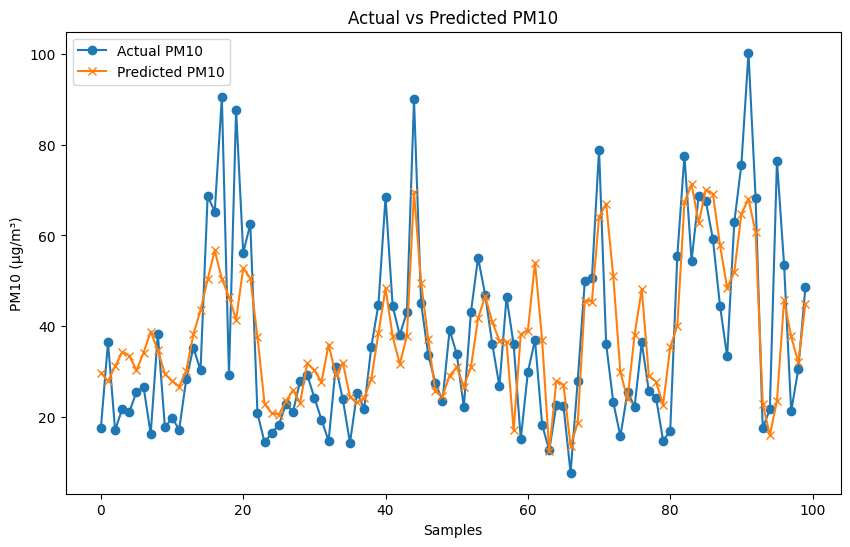

In [213]:
# 시각화 실제 값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:100], label="Actual PM10", marker='o')
plt.plot(y_pred_inv[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [206]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# 하이퍼파라미터 정의
param_grid = {
    'units': [256],
    'Dense': [64, 128, 256],
    'dropout': [0],
    'learning_rate': [0.01],
    'batch_size': [64],
    'epochs': [50]
}

# 하이퍼파라미터 조합 생성
grid = ParameterGrid(param_grid)

# 최적화 루프
best_model = None
best_score = float('inf')

best_params = None

for params in grid:
    # 모델 정의
    model = Sequential()
    model.add(LSTM(params['units'], input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1))  # 출력층

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')

    # 모델 학습
    history = model.fit(X_train_lstm, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        validation_split=0.2,
                        verbose=0)

    # 평가
    val_loss = min(history.history['val_loss'])
    if val_loss < best_score:
        best_score = val_loss
        best_model = model
        best_params = params  # 최적 하이퍼파라미터 저장

print("최적의 하이퍼파라미터:", best_params)
print("최소 Validation Loss:", best_score)



최적의 하이퍼파라미터: {'batch_size': 64, 'dropout': 0, 'epochs': 50, 'learning_rate': 0.01, 'units': 256}
최소 Validation Loss: 0.0008446525898762047


# RandomForest

In [211]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 인구수, 전력량
# PM10 예측을 위해 Feature와 Target을 정의
features = ['평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름',]
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_2['일시'] = pd.to_datetime(data_2['일시'])

# 연도 정보 추출
data_2['연도'] = data_2['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_2[data_2['연도'].between(2011, 2017)]
test_data = data_2[data_2['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


# RandomForest 모델 정의
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=15, random_state=42)


# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 13.50305384982805
R² Score: 0.628925402125324


In [ ]:
# RMSE: 13.48800947349955
# R² Score: 0.6297518042192434

# 인구, 전력
# RMSE: 13.51341798370639
# R² Score: 0.6283555543290688

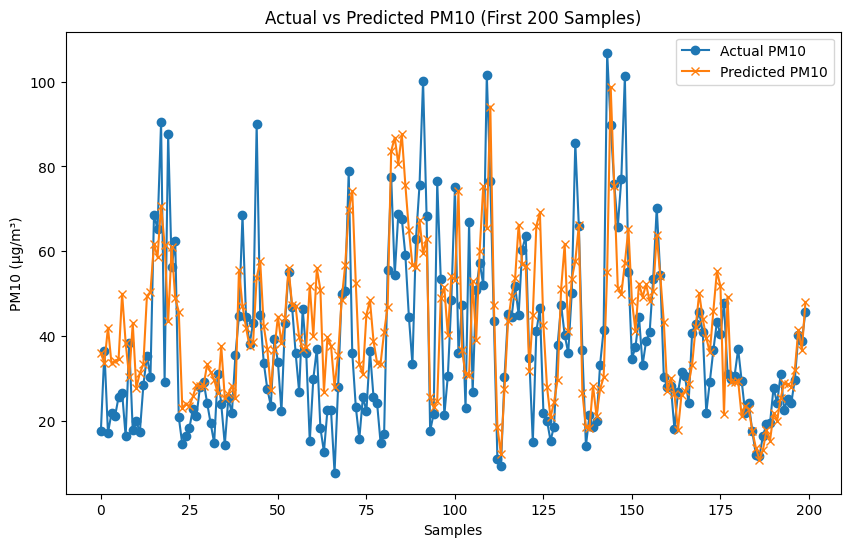

In [306]:
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:200], label="Actual PM10", marker='o')  # 실제 값
plt.plot(y_pred[:200], label="Predicted PM10", marker='x')  # 예측 값
plt.title("Actual vs Predicted PM10 (First 200 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()


In [188]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# PM10 예측을 위해 Feature와 Target을 정의
features = ['평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
       'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_2['일시'] = pd.to_datetime(data_2['일시'])

# 연도 정보 추출
data_2['연도'] = data_2['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_2[data_2['연도'].between(2011, 2017)]
test_data = data_2[data_2['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

NameError: name 'data_2' is not defined

In [279]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정 # 그리드 추가 및 변경 조절
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [5, 10, 12],  # 최대 깊이
}

# 랜덤포레스트 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# GridSearch 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델 가져오기
best_rf_model = grid_search.best_estimator_

# Test 데이터에 대한 예측
y_pred_best_rf = best_rf_model.predict(X_test)

# 평가 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest RMSE: {rmse}")
print(f"Optimized Random Forest R² Score: {r2}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Optimized Random Forest RMSE: 13.624829999084628
Optimized Random Forest R² Score: 0.6222022121921631


In [ ]:
# Optimized Random Forest RMSE: 13.760082446139391
# Optimized Random Forest R² Score: 0.6146642541747527

# XGBoost

In [ ]:
from xgboost import XGBRegressor

# feature,target, train_data, test_data는 앞과 동일

# XGBoost 모델 학습
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,  # 전체 학습 데이터를 사용
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xg = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))
r2 = r2_score(y_test, y_pred_xg)

print(f"XGBoost RMSE: {rmse}")
print(f"XGBoost R² Score: {r2}")


XGBoost RMSE: 13.81078395127031
XGBoost R² Score: 0.6118193444354447


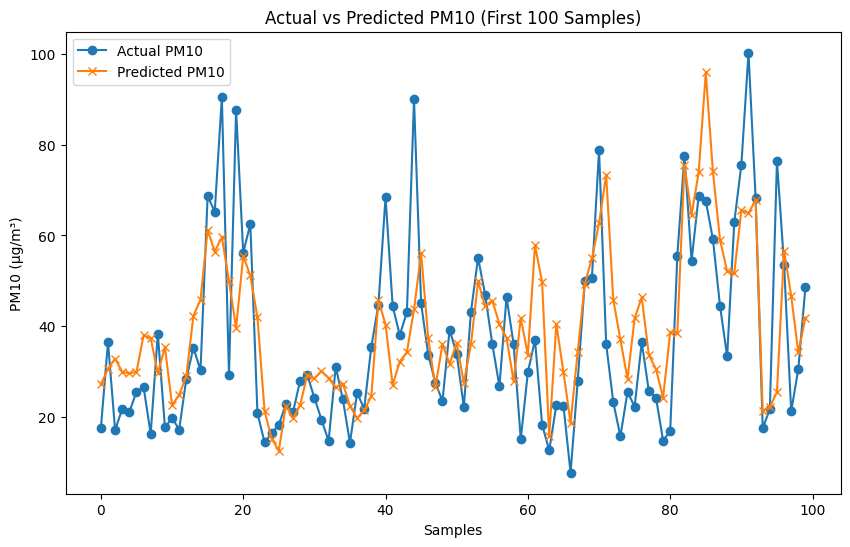

In [ ]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual PM10", marker='o')
plt.plot(y_pred_xg[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# XGBoost RMSE: 13.564954123738097
# XGBoost R² Score: 0.6255154671864753

In [195]:
# 특성과 타겟 설정
features = ['평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
            'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_2['일시'] = pd.to_datetime(data_2['일시'])

# 연도 정보 추출
data_2['연도'] = data_2['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_2[data_2['연도'].between(2011, 2017)]
test_data = data_2[data_2['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train= train_data[features].values  # DataFrame -> NumPy 배열 LSTM에선 NumPy 배열이어야 함
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values


In [197]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보군 설정
param_grid = {
    'n_estimators': [300, 2000],
    'learning_rate': [0.01],
    'max_depth': [7, 12]
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,  # 교차 검증
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best_xg = best_model.predict(X_test)

# 성능 평가
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_xg))
r2_best = r2_score(y_test, y_pred_best_xg)

print(f"Optimized RMSE: {rmse_best}")
print(f"Optimized R² Score: {r2_best}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Optimized RMSE: 13.612362647857692
Optimized R² Score: 0.6228933008466958


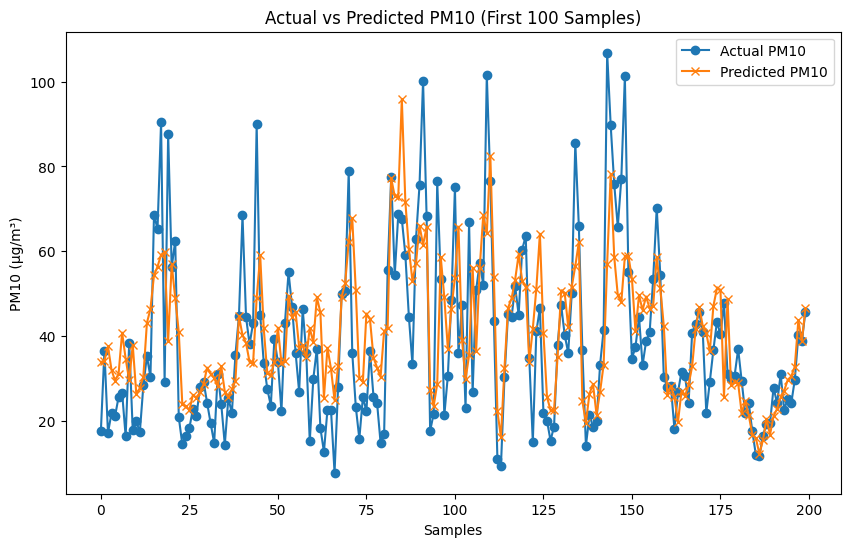

In [199]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], label="Actual PM10", marker='o')
plt.plot(y_pred_best_xg[:200], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# Optimized RMSE: 13.976777610662488
# Optimized R² Score: 0.6024320775919914

# 선형회귀 / _후

RMSE: 14.380717038862192
R² Score: 0.5791199811320924


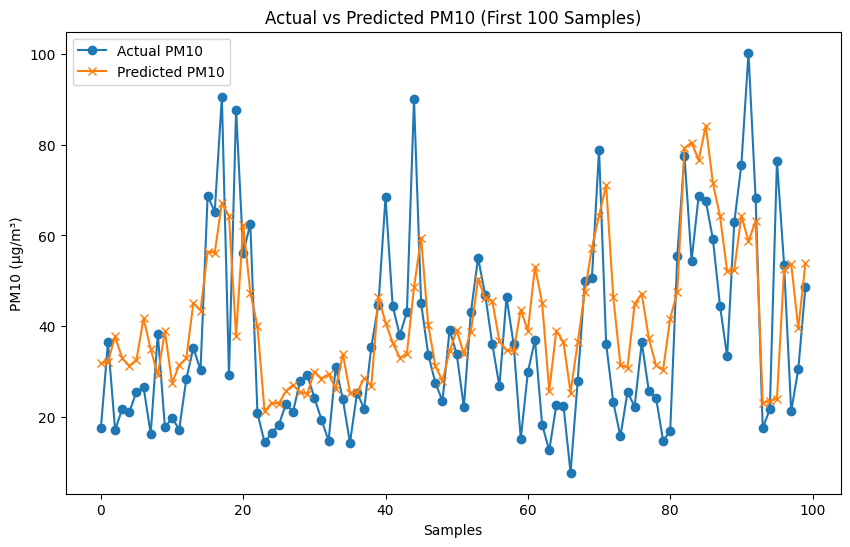

In [212]:
# 회귀분석
from sklearn.linear_model import LinearRegression

# Feature와 Target 정의
features = ['차량수', '평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향',
            'SO2', 'CO', 'O3', 'NO2', '인구수', '전력량', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# Feature와 Target 데이터 추출
X = data_plus[features]
y = data_plus[target]

# Train/Test 데이터 분리

# '일시' 열을 datetime 형식으로 변환
data_plus['일시'] = pd.to_datetime(data_plus['일시'])

# 연도 정보 추출
data_plus['연도'] = data_plus['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_plus[data_plus['연도'].between(2011, 2017)]
test_data = data_plus[data_plus['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train_lreg = train_data[features]
y_train_lreg = train_data[target]
X_test_lreg = test_data[features]
y_test_lreg = test_data[target]

# 선형회귀 모델 생성 및 학습
model_lreg = LinearRegression()
model_lreg.fit(X_train_lreg, y_train_lreg)

# 모델 평가
y_pred_lreg = model_lreg.predict(X_test_lreg)

# 평가 지표 계산
rmse = np.sqrt(mean_squared_error(y_test_lreg, y_pred_lreg))
r2 = r2_score(y_test_lreg, y_pred_lreg)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual PM10", marker='o')
plt.plot(y_pred[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

RMSE: 14.242835733254354
R² Score: 0.5871520264661254


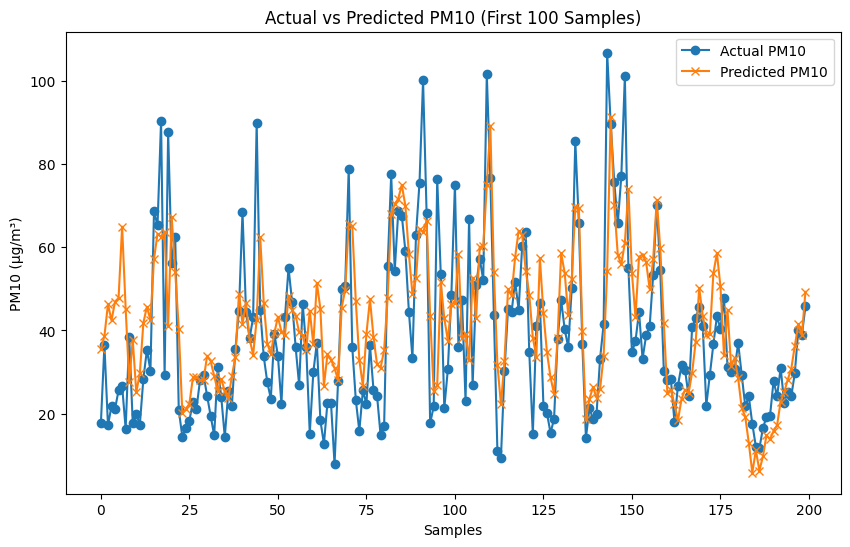

In [214]:
# 회귀분석
from sklearn.linear_model import LinearRegression

# Feature와 Target 정의
features = ['평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향',
            'SO2', 'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# Feature와 Target 데이터 추출
X = data_2[features]
y = data_2[target]

# Train/Test 데이터 분리

# '일시' 열을 datetime 형식으로 변환
data_2['일시'] = pd.to_datetime(data_2['일시'])

# 연도 정보 추출
data_2['연도'] = data_2['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_2[data_2['연도'].between(2011, 2017)]
test_data = data_2[data_2['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train_lreg = train_data[features]
y_train_lreg = train_data[target]
X_test_lreg = test_data[features]
y_test_lreg = test_data[target]

# 선형회귀 모델 생성 및 학습
model_lreg = LinearRegression()
model_lreg.fit(X_train_lreg, y_train_lreg)

# 모델 평가
y_pred_lreg = model_lreg.predict(X_test_lreg)

# 평가 지표 계산
rmse = np.sqrt(mean_squared_error(y_test_lreg, y_pred_lreg))
r2 = r2_score(y_test_lreg, y_pred_lreg)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test_lreg[:200].values, label="Actual PM10", marker='o')
plt.plot(y_pred_lreg[:200], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# RMSE: 14.380717038862192
# R² Score: 0.5791199811320924

In [216]:
# 선형회귀 후 랜덤포레스트 학습

# feature,target, train_data, test_data는 앞과 동일

# Feature와 Target 분리
X_train_lreg_rf = train_data[features]
y_train_lreg_rf = train_data[target]
X_test_lreg_rf = test_data[features]
y_test_lreg_rf = test_data[target]

# 선형 회귀 모델로 선형적 관계 학습
lreg_rf= LinearRegression()
lreg_rf.fit(X_train_lreg_rf, y_train_lreg_rf)

# 잔차 계산
# 선형 회귀 예측
y_train_lreg_rf_pred = lreg_rf.predict(X_train_lreg_rf)
y_test_lreg_rf_pred = lreg_rf.predict(X_test_lreg_rf)

# 잔차 계산 (실제 값 - 선형 회귀 예측 값)
residuals_train = y_train_lreg_rf - y_train_lreg_rf_pred
residuals_test = y_test_lreg_rf - y_test_lreg_rf_pred

# Random Forest 모델로 잔차 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=2000)
rf_model.fit(X_train_lreg_rf, residuals_train)

# Random Forest로 잔차 예측
rf_residuals_test_pred = rf_model.predict(X_test_lreg_rf)

# 최종 예측 (선형 회귀 예측 + Random Forest 잔차 예측)
y_test_final_pred = y_test_lreg_rf_pred + rf_residuals_test_pred

# 평가
rmse_final = np.sqrt(mean_squared_error(y_test_lreg_rf, y_test_final_pred))
r2_final = r2_score(y_test_lreg_rf, y_test_final_pred)

print(f"Final RMSE: {rmse_final}")
print(f"Final R² Score: {r2_final}")


Final RMSE: 13.460445578389724
Final R² Score: 0.631263525361973


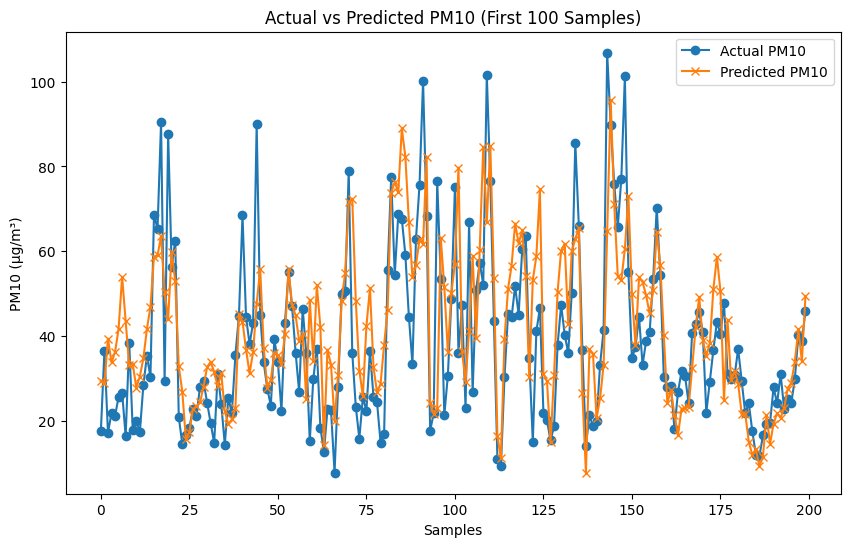

In [217]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test_lreg_rf.values[:200], label="Actual PM10", marker='o')
plt.plot(y_test_final_pred[:200], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# Final RMSE: 13.617175882941584
# Final R² Score: 0.6226265691785027

In [ ]:
# 가장 좋은 값 설정을 위해

In [ ]:
# 선형회귀 후  Random Forest 하이퍼파라미터 최적화
param_grid = {
    'n_estimators': [50, 100, 200],        # 트리 개수
    'max_depth': [10, 20, 30],          # 최대 깊이
}

# Random Forest 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,                                 # 3-Fold 교차 검증
    scoring='neg_mean_squared_error',     # MSE를 음수로 반환
    verbose=2,
    n_jobs=-1                             # 병렬 처리
)

# 최적화를 위한 학습 (잔차를 학습)
grid_search.fit(X_train_lreg_rf, residuals_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 Random Forest 모델로 잔차 학습
best_rf_model = grid_search.best_estimator_

# 4. Random Forest로 잔차 예측
rf_residuals_test_pred = best_rf_model.predict(X_test_lreg_rf)

# 5. 최종 예측 (선형 회귀 예측 + Random Forest 잔차 예측)
y_test_final_pred = y_test_lreg_rf_pred + rf_residuals_test_pred

# 6. 평가
rmse_final = np.sqrt(mean_squared_error(y_test_lreg_rf, y_test_final_pred))
r2_final = r2_score(y_test_lreg_rf, y_test_final_pred)

print(f"Optimized Final RMSE: {rmse_final}")
print(f"Optimized Final R² Score: {r2_final}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Optimized Final RMSE: 13.615668291850183
Optimized Final R² Score: 0.6227101244375071


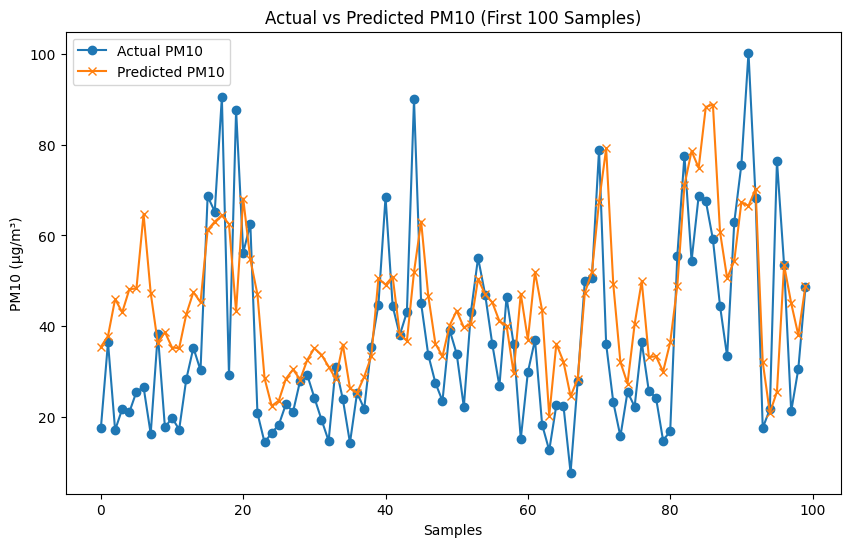

In [ ]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test_lreg_rf.values[:100], label="Actual PM10", marker='o')
plt.plot(y_test_final_pred[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# Optimized Final RMSE: 13.55
# Optimized Final R² Score: 0.6264

In [218]:
# 선형 회귀 후 XGBoost

# 선형 회귀
lreg_xg = LinearRegression()
lreg_xg.fit(X_train, y_train)

y_train_pred_xg = lreg_xg.predict(X_train)
y_test_pred_xg = lreg_xg.predict(X_test)

residuals_train = y_train - y_train_pred_xg
residuals_test = y_test - y_test_pred_xg

# XGBoost로 잔차 학습
xgb_model = XGBRegressor(n_estimators=2000, max_depth=7, random_state=42)
xgb_model.fit(X_train, residuals_train)

rf_residuals_test_pred_xg = xgb_model.predict(X_test)

# 최종 예측
y_test_final_pred_xg = y_test_pred_xg + rf_residuals_test_pred_xg

rmse_final = np.sqrt(mean_squared_error(y_test, y_test_final_pred_xg))
r2_final = r2_score(y_test, y_test_final_pred_xg)

print(f"Final RMSE: {rmse_final}")
print(f"Final R² Score: {r2_final}")


Final RMSE: 14.928792755897847
Final R² Score: 0.5464276159215375


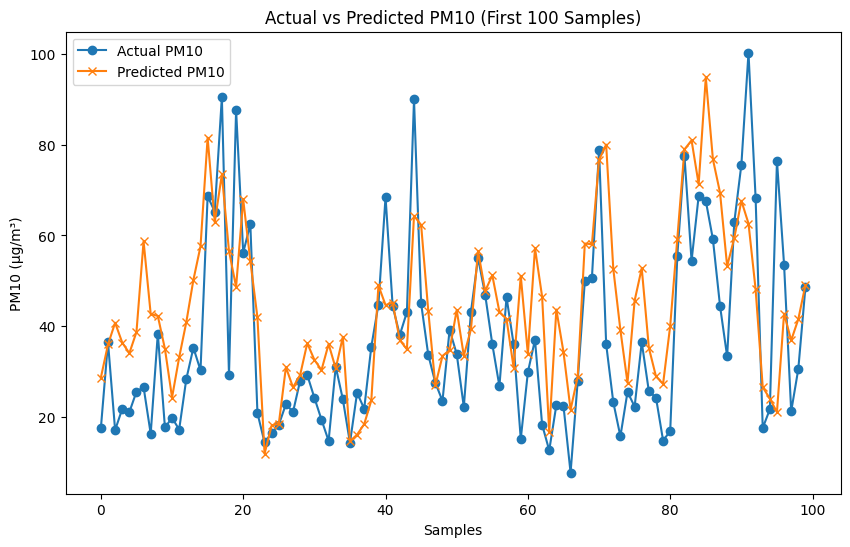

In [ ]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual PM10", marker='o')
plt.plot(y_test_final_pred_xg[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# Final RMSE: 14.197964563423161
# Final R² Score: 0.5897492326678779

In [ ]:
# 1. 선형 회귀

# 2. XGBoost 하이퍼파라미터 최적화
param_grid = {
    'n_estimators': [100, 200, 300],       # 트리 개수
    'learning_rate': [0.01],   # 학습률
    'max_depth': [5,7,12],               # 트리의 최대 깊이
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # 3-Fold 교차 검증
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, residuals_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 3. 최적 모델로 잔차 학습
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, residuals_train)

# 잔차 예측
residuals_test_pred_xg = best_xgb_model.predict(X_test)

# 최종 예측
y_test_final_pred_xg = y_test_pred_xg + residuals_test_pred_xg

# 평가
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_final_pred_xg))
r2_final = r2_score(y_test, y_test_final_pred_xg)

print(f"Optimized Final RMSE: {rmse_final}")
print(f"Optimized Final R² Score: {r2_final}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Optimized Final RMSE: 13.880626414018579
Optimized Final R² Score: 0.6078832831972797


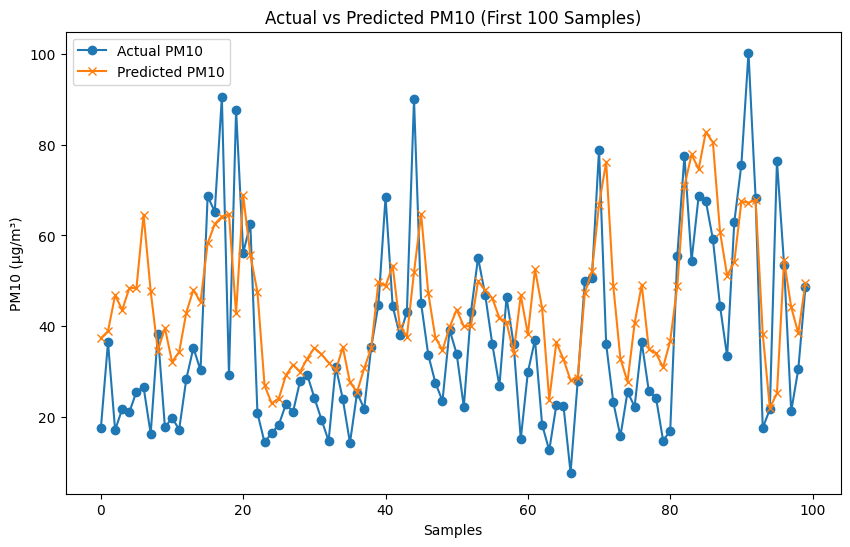

In [ ]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual PM10", marker='o')
plt.plot(y_test_final_pred_xg[:100], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10 (First 100 Samples)")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()

In [ ]:
# Optimized Final RMSE: 13.880626414018579
# Optimized Final R² Score: 0.6078832831972797

# 이상치 처리 예정

In [ ]:
# 추가 수정

In [191]:
da = data_plus.copy()

In [192]:
# 미세먼지 값 기준으로 내림차순 정렬
sorted_data = da.sort_values(by='PM10', ascending=False)


In [193]:
da = data_plus.copy()

# 미세먼지 값 기준으로 내림차순 정렬
sorted_data = da.sort_values(by='PM10', ascending=False)

# 상위 10개 데이터 추출
top_10_data = sorted_data.head(10)

print("미세먼지 농도 상위 10개 데이터:")
print(top_10_data)


미세먼지 농도 상위 10개 데이터:
              일시  시군구     차량수  평균기온  평균상대습도  강수량  평균풍속  최다풍향       SO2  \
7892  2015-02-23  원주시  140622   2.1    58.4  0.0   1.9   270  0.004521   
14295 2015-02-23  춘천시  115826   1.4    57.3  0.0   2.0   230  0.003187   
1490  2015-02-23  강릉시   96178   4.8    33.0  0.0   5.9   290  0.003667   
2293  2017-05-06  강릉시  102871  18.8    19.1  0.0   4.3   320  0.006375   
4693  2015-02-23  동해시   39801   5.8    29.9  0.0   3.4   250  0.002750   
3303  2011-05-02  동해시   36151  16.4    50.1  0.0   2.7   110  0.003250   
12902 2011-05-02  춘천시  107332  15.2    56.8  0.0   1.1   200  0.002171   
6499  2011-05-02  원주시  127739  15.1    56.5  0.0   1.4   270  0.004375   
3314  2011-05-13  동해시   36151  19.1    28.3  0.0   5.4   250  0.002250   
12386 2018-11-29  정선군   20657   1.8    61.5  0.0   1.4   320  0.002014   

             CO  ...     인구수        전력량        PM10     PM10-1d  서풍계열  계절_숫자  \
7892   0.818750  ...  134826  223027535  606.687500  140.479167     3      4   
14295

In [194]:
# 유독 높은 2개의 데이터 삭제
top_2_data = sorted_data.head(2)

data_2 = data_plus.drop(top_2_data.index)

In [247]:
data_2

,일시,시군구,차량수,평균기온,평균상대습도,강수량,평균풍속,최다풍향,SO2,CO,...,전력량,PM10,PM10-1d,서풍계열,계절_숫자,계절_가을,계절_겨울,계절_봄,계절_여름,연도
0,2011-01-01,강릉시,89310,-1.5,71.4,6.0,3.2,320,0.006083,0.458333,...,169825,25.500000,35.541667,1,4,False,True,False,False,2011
1,2011-01-02,강릉시,89310,0.6,66.4,0.5,1.9,270,0.006625,0.454167,...,169825,20.708333,25.500000,3,4,False,True,False,False,2011
2,2011-01-03,강릉시,89310,-0.9,83.6,6.5,2.1,270,0.005750,0.487500,...,169825,20.916667,20.708333,3,4,False,True,False,False,2011
3,2011-01-04,강릉시,89310,-0.1,47.1,0.0,3.7,250,0.005667,0.533333,...,169825,36.666667,20.916667,3,4,False,True,False,False,2011
4,2011-01-05,강릉시,89310,-0.6,46.5,0.0,4.7,250,0.006048,0.504762,...,169825,50.333333,36.666667,3,4,False,True,False,False,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063,2019-12-27,춘천시,134390,-2.5,59.3,0.0,1.1,270,0.002375,0.570833,...,163734041,40.541667,50.541667,3,4,False,True,False,False,2019
16064,2019-12-28,춘천시,134390,-1.5,66.0,0.0,0.4,20,0.002938,0.750000,...,163734041,55.312500,40.541667,0,4,False,True,False,False,2019
16065,2019-12-29,춘천시,134390,0.5,76.3,0.0,0.3,360,0.003458,0.966667,...,163734041,68.187500,55.312500,0,4,False,True,False,False,2019
16066,2019-12-30,춘천시,134390,2.2,68.8,0.5,1.6,250,0.002417,0.737500,...,163734041,44.208333,68.187500,3,4,False,True,False,False,2019


IQR 방식:
1사분위수(Q1)와 3사분위수(Q3)를 계산.
IQR = Q3 - Q1.
이상치 기준:
하한값:
𝑄
1−1.5
×𝐼
𝑄
𝑅
Q1−1.5×IQR

'PM10', '강수량', 'SO2', 'CO', 'O3', 'NO2'

In [296]:
# 특성과 타겟 설정
features = ['평균기온', '평균상대습도', '강수량', '평균풍속', '최다풍향', 'SO2',
            'CO', 'O3', 'NO2', 'PM10-1d', '서풍계열', '계절_가을', '계절_겨울', '계절_봄', '계절_여름']
target = 'PM10'

# '일시' 열을 datetime 형식으로 변환
data_2['일시'] = pd.to_datetime(data_2['일시'])

# 연도 정보 추출
data_2['연도'] = data_2['일시'].dt.year

# Train/Test 데이터 분리 (2011-2017년: Train, 2018-2019년: Test)
train_data = data_2[data_2['연도'].between(2011, 2017)]
test_data = data_2[data_2['연도'].between(2018, 2019)]

# Feature와 Target 분리
X_train= train_data[features].values  # DataFrame -> NumPy 배열 LSTM에선 NumPy 배열이어야 함
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# 데이터 정규화
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()
X_train = scaler_X_lstm.fit_transform(X_train)
X_test = scaler_X_lstm.transform(X_test)
y_train = scaler_y_lstm.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y_lstm.transform(y_test.reshape(-1, 1))

# LSTM 입력 형태로 변환 (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [297]:
# LSTM 256 256 256 256
model = Sequential([
    LSTM(256, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),

    LSTM(256, activation='relu', return_sequences=True),

    LSTM(256, activation='relu', return_sequences=True),

    LSTM(256, activation='relu', return_sequences=False),

    Dense(256, activation='relu'),
    Dense(1)  # 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# 모델 평가
loss = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f'Test Loss: {loss}')

# 예측
y_pred = model.predict(X_test_lstm)

# 역정규화
y_test_inv = scaler_y_lstm.inverse_transform(y_test)
y_pred_inv = scaler_y_lstm.inverse_transform(y_pred)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

In [ ]:
# 256 256 256 256 256
# RMSE: 13.243831415244678
# R² Score: 0.6430359223684665

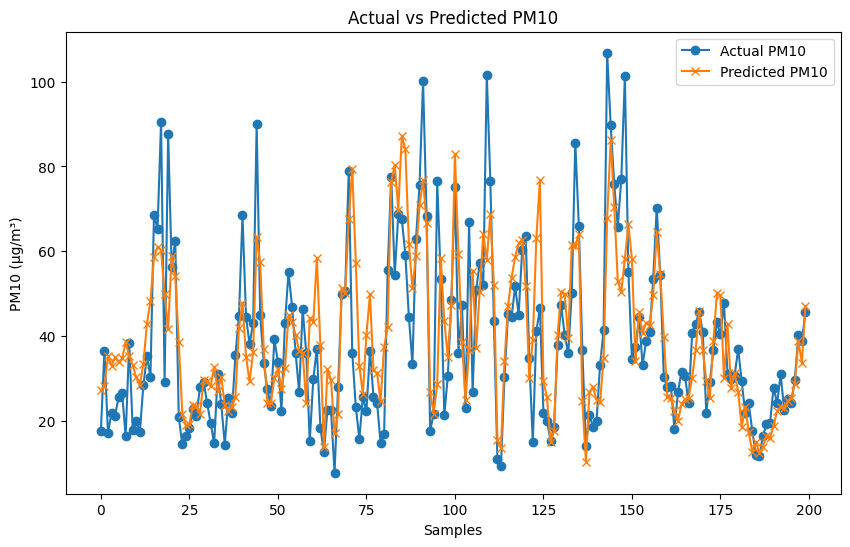

In [298]:
# 시각화 실제 값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:200], label="Actual PM10", marker='o')
plt.plot(y_pred_inv[:200], label="Predicted PM10", marker='x')
plt.title("Actual vs Predicted PM10")
plt.xlabel("Samples")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.show()